In [ ]:
import numpy as np
import scipy.signal as signal
import scipy.linalg as linalg
import math
from math import cos, sin, tan
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
import random
from numpy.random import randint
from numpy.random import rand

In [ ]:
# Variables
pn=0
pe=0
pd=0
phi=0
theta=0
psi=0
u=0
v=0
w=0
p=0
q=0
r=0

phi_c=0
theta_c=0
r_c=0

pn_data=[]
pe_data=[]
pd_data=[]
phi_data=[]
theta_data=[]
psi_data=[]
u_data=[]
v_data=[]
w_data=[]
p_data=[]
q_data=[]
r_data=[]

phi_c_data=[]
theta_c_data=[]
r_c_data=[]
pn_c_data=[]
pe_c_data=[]
pd_c_data=[]
u_c_data=[]
v_c_data=[]
w_c_data=[]
psi_c_data=[]


error_phi=[]
error_theta=[]
error_r=[]
error_pn=[]
error_pe=[]
error_pd=[]
error_u=[]
error_v=[]
error_w=[]
error_psi=[]

p_sensor_data=[]
q_sensor_data=[]
r_sensor_data=[]
az_sensor_data=[]
pn_sensor_data=[]
pe_sensor_data=[]
pd_sensor_data=[]

phi_sensor_data=[]
theta_sensor_data=[]

# Fixed Parameters
Ts = 1/10
Jx = 0.114700
Jy = 0.057600
Jz = 0.171200
g = 9.806650
m = 1.56

states=np.array([pn, pe, pd, u, v, w, phi, theta, psi,  p, q, r])

#Simulation Parameters
Ts=0.05
Tfinal=15
Tsteps=Tfinal/Ts
frames=int(Tsteps)

In [ ]:
def RM_body2inertial(phi, theta, psi):
    R_b_w=np.array([[cos(theta)*cos(psi), sin(phi)*sin(theta)*cos(psi)-cos(phi)*sin(psi), cos(phi)*sin(theta)*cos(psi)+sin(phi)*sin(psi)],
         [cos(theta)*sin(psi), sin(phi)*sin(theta)*sin(psi)+cos(phi)*cos(psi), cos(phi)*sin(theta)*sin(psi)-sin(phi)*cos(psi)],
         [-sin(theta), sin(phi)*cos(theta), cos(phi)*cos(theta)]])
    return R_b_w

In [ ]:
def rot_psi (psi):
    R_psi=np.array([[cos(psi), sin(psi), 0],
         [-sin(psi), cos(psi), 0],
         [0, 0, 1]])
    return R_psi

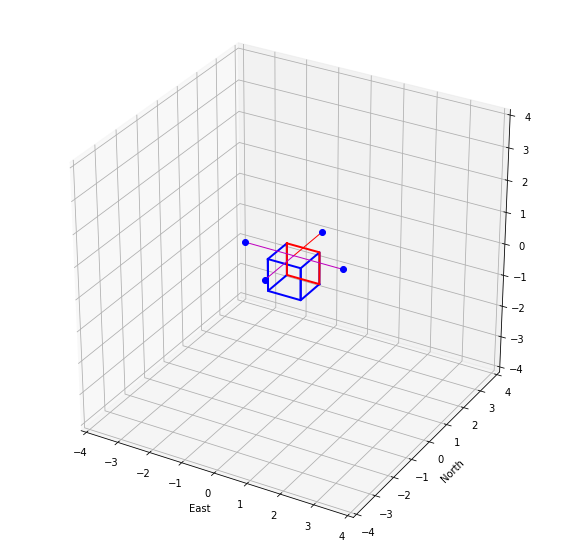

In [ ]:
#Axis Correction
AC=np.array([[0,1,0],
      [1,0,0],
      [0,0,-1]])

# vertices of a cube (defined in body frame)
w=1
v1=np.array([w/2,-w/2,-w/2]).T
v2=np.array([w/2, -w/2, w/2]).T
v3=np.array([w/2, w/2, w/2]).T
v4=np.array([w/2, w/2, -w/2]).T
v5=np.array([-w/2, -w/2, -w/2]).T
v6=np.array([-w/2, -w/2, w/2]).T
v7=np.array([-w/2, w/2, w/2]).T
v8=np.array([-w/2, w/2, -w/2]).T

v9=np.array([0, 0, -w/2]).T

v10=np.array([3*w/2, 0, -w/2]).T
v11=np.array([0, 3*w/2, -w/2]).T
v12=np.array([-3*w/2, 0, -w/2]).T
v13=np.array([0, -3*w/2, -w/2]).T

# inertial coordiantes
N_i=np.array([1, 0, 0]).T
E_i=np.array([0, 1, 0]).T
D_i=np.array([0, 0, 1]).T

# Rotate and translate the vertices
pos_ned=np.array([pn, pe, pd]).T
R=RM_body2inertial(phi, theta, psi)
v1r=np.matmul(R,v1)+pos_ned
v2r=np.matmul(R,v2)+pos_ned
v3r=np.matmul(R,v3)+pos_ned
v4r=np.matmul(R,v4)+pos_ned
v5r=np.matmul(R,v5)+pos_ned
v6r=np.matmul(R,v6)+pos_ned
v7r=np.matmul(R,v7)+pos_ned
v8r=np.matmul(R,v8)+pos_ned

v9r=np.matmul(R,v9)+pos_ned

v10r=np.matmul(R,v10)+pos_ned
v11r=np.matmul(R,v11)+pos_ned
v12r=np.matmul(R,v12)+pos_ned
v13r=np.matmul(R,v13)+pos_ned

# Axis Correction
v1r=np.matmul(AC,v1r)
v2r=np.matmul(AC,v2r)
v3r=np.matmul(AC,v3r)
v4r=np.matmul(AC,v4r)
v5r=np.matmul(AC,v5r)
v6r=np.matmul(AC,v6r)
v7r=np.matmul(AC,v7r)
v8r=np.matmul(AC,v8r)

v9r=np.matmul(AC,v9r)

v10r=np.matmul(AC,v10r)
v11r=np.matmul(AC,v11r)
v12r=np.matmul(AC,v12r)
v13r=np.matmul(AC,v13r)

# face for 4 cube faces
f1_x=[v1r[0], v2r[0], v3r[0], v4r[0], v1r[0]]
f1_y=[v1r[1], v2r[1], v3r[1], v4r[1], v1r[1]]
f1_z=[v1r[2], v2r[2], v3r[2], v4r[2], v1r[2]]
f2_x=[v5r[0], v6r[0], v7r[0], v8r[0], v5r[0]]
f2_y=[v5r[1], v6r[1], v7r[1], v8r[1], v5r[1]]
f2_z=[v5r[2], v6r[2], v7r[2], v8r[2], v5r[2]]
f3_x=[v3r[0], v4r[0], v8r[0], v7r[0], v3r[0]]
f3_y=[v3r[1], v4r[1], v8r[1], v7r[1], v3r[1]]
f3_z=[v3r[2], v4r[2], v8r[2], v7r[2], v3r[2]]
f4_x=[v2r[0], v1r[0], v5r[0], v6r[0], v2r[0]]
f4_y=[v2r[1], v1r[1], v5r[1], v6r[1], v2r[1]]
f4_z=[v2r[2], v1r[2], v5r[2], v6r[2], v2r[2]]

# rotors for front, back, right,left
rf_x=[v9r[0],v10r[0]]
rf_y=[v9r[1],v10r[1]]
rf_z=[v9r[2],v10r[2]]
rb_x=[v9r[0],v12r[0]]
rb_y=[v9r[1],v12r[1]]
rb_z=[v9r[2],v12r[2]]
rl_x=[v9r[0],v11r[0]]
rl_y=[v9r[1],v11r[1]]
rl_z=[v9r[2],v11r[2]]
rr_x=[v9r[0],v13r[0]]
rr_y=[v9r[1],v13r[1]]
rr_z=[v9r[2],v13r[2]]

fan_x=[v10r[0], v11r[0], v12r[0], v13r[0]]
fan_y=[v10r[1], v11r[1], v12r[1], v13r[1]]
fan_z=[v10r[2], v11r[2], v12r[2], v13r[2]]

pn_data.append(states[0])
pe_data.append(states[1])
pd_data.append(states[2])
phi_data.append(states[6])
theta_data.append(states[7])
psi_data.append(states[8])
u_data.append(states[3])
v_data.append(states[4])
w_data.append(states[5])
p_data.append(states[9])
q_data.append(states[10])
r_data.append(states[11])

pn_c_data.append(0)
pe_c_data.append(0)
pd_c_data.append(0)

# coordinate frame
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('East')
plt.ylabel('North')

ax.set_xlim(( -4, 4))
ax.set_ylim((-4, 4))
ax.set_zlim((-4, 4))

face2, = ax.plot(f2_x, f2_y, f2_z, 'b', lw=2)
face3, = ax.plot(f3_x, f3_y, f3_z, 'b', lw=2)
face4, = ax.plot(f4_x, f4_y, f4_z, 'b', lw=2)
face1, = ax.plot(f1_x, f1_y, f1_z, 'r', lw=2)

rotorf, = ax.plot(rf_x, rf_y, rf_z, 'r', lw=1)
rotorb, = ax.plot(rb_x, rb_y, rb_z, 'm', lw=1)
rotorl, = ax.plot(rl_x, rl_y, rl_z, 'm', lw=1)
rotorr, = ax.plot(rr_x, rr_y, rr_z, 'm', lw=1)

fan,=ax.plot(fan_x,fan_y,fan_z,'bo',markersize=6)

quad_traj,=ax.plot(pe_data,pn_data,pd_data,'b:',lw=2)

ref_traj,=ax.plot(pe_c_data,pn_c_data,pd_c_data,'y:',lw=2)

In [ ]:
def quadrotor(phi, theta, psi , pn, pe, pd):
  v1=np.array([w/2,-w/2,-w/2]).T
  v2=np.array([w/2, -w/2, w/2]).T
  v3=np.array([w/2, w/2, w/2]).T
  v4=np.array([w/2, w/2, -w/2]).T
  v5=np.array([-w/2, -w/2, -w/2]).T
  v6=np.array([-w/2, -w/2, w/2]).T
  v7=np.array([-w/2, w/2, w/2]).T
  v8=np.array([-w/2, w/2, -w/2]).T
  v9=np.array([0, 0, -w/2]).T
  v10=np.array([3*w/2, 0, -w/2]).T
  v11=np.array([0, 3*w/2, -w/2]).T
  v12=np.array([-3*w/2, 0, -w/2]).T
  v13=np.array([0, -3*w/2, -w/2]).T

  N_i=np.array([1, 0, 0]).T
  E_i=np.array([0, 1, 0]).T
  D_i=np.array([0, 0, 1]).T

  pos_ned=np.array([pn, pe, pd]).T
  R=RM_body2inertial(phi, theta, psi)

  v1r=np.matmul(R,v1)+pos_ned
  v2r=np.matmul(R,v2)+pos_ned
  v3r=np.matmul(R,v3)+pos_ned
  v4r=np.matmul(R,v4)+pos_ned
  v5r=np.matmul(R,v5)+pos_ned
  v6r=np.matmul(R,v6)+pos_ned
  v7r=np.matmul(R,v7)+pos_ned
  v8r=np.matmul(R,v8)+pos_ned
  v9r=np.matmul(R,v9)+pos_ned
  v10r=np.matmul(R,v10)+pos_ned
  v11r=np.matmul(R,v11)+pos_ned
  v12r=np.matmul(R,v12)+pos_ned
  v13r=np.matmul(R,v13)+pos_ned

  v1r=np.matmul(AC,v1r)
  v2r=np.matmul(AC,v2r)
  v3r=np.matmul(AC,v3r)
  v4r=np.matmul(AC,v4r)
  v5r=np.matmul(AC,v5r)
  v6r=np.matmul(AC,v6r)
  v7r=np.matmul(AC,v7r)
  v8r=np.matmul(AC,v8r)

  v9r=np.matmul(AC,v9r)

  v10r=np.matmul(AC,v10r)
  v11r=np.matmul(AC,v11r)
  v12r=np.matmul(AC,v12r)
  v13r=np.matmul(AC,v13r)

  f1_x=[v1r[0], v2r[0], v3r[0], v4r[0], v1r[0]]
  f1_y=[v1r[1], v2r[1], v3r[1], v4r[1], v1r[1]]
  f1_z=[v1r[2], v2r[2], v3r[2], v4r[2], v1r[2]]
  f2_x=[v5r[0], v6r[0], v7r[0], v8r[0], v5r[0]]
  f2_y=[v5r[1], v6r[1], v7r[1], v8r[1], v5r[1]]
  f2_z=[v5r[2], v6r[2], v7r[2], v8r[2], v5r[2]]
  f3_x=[v3r[0], v4r[0], v8r[0], v7r[0], v3r[0]]
  f3_y=[v3r[1], v4r[1], v8r[1], v7r[1], v3r[1]]
  f3_z=[v3r[2], v4r[2], v8r[2], v7r[2], v3r[2]]
  f4_x=[v2r[0], v1r[0], v5r[0], v6r[0], v2r[0]]
  f4_y=[v2r[1], v1r[1], v5r[1], v6r[1], v2r[1]]
  f4_z=[v2r[2], v1r[2], v5r[2], v6r[2], v2r[2]]

  rf_x=[v9r[0],v10r[0]]
  rf_y=[v9r[1],v10r[1]]
  rf_z=[v9r[2],v10r[2]]
  rb_x=[v9r[0],v12r[0]]
  rb_y=[v9r[1],v12r[1]]
  rb_z=[v9r[2],v12r[2]]
  rl_x=[v9r[0],v11r[0]]
  rl_y=[v9r[1],v11r[1]]
  rl_z=[v9r[2],v11r[2]]
  rr_x=[v9r[0],v13r[0]]
  rr_y=[v9r[1],v13r[1]]
  rr_z=[v9r[2],v13r[2]]

  fan_x=[v10r[0], v11r[0], v12r[0], v13r[0]]
  fan_y=[v10r[1], v11r[1], v12r[1], v13r[1]]
  fan_z=[v10r[2], v11r[2], v12r[2], v13r[2]]

  face1.set_data(f1_x, f1_y)
  face1.set_3d_properties(f1_z)

  face2.set_data(f2_x, f2_y)
  face2.set_3d_properties(f2_z)

  face3.set_data(f3_x, f3_y)
  face3.set_3d_properties(f3_z)

  face4.set_data(f4_x, f4_y)
  face4.set_3d_properties(f4_z)

  rotorf.set_data(rf_x, rf_y)
  rotorf.set_3d_properties(rf_z)

  rotorb.set_data(rb_x, rb_y)
  rotorb.set_3d_properties(rb_z)

  rotorl.set_data(rl_x, rl_y)
  rotorl.set_3d_properties(rl_z)

  rotorr.set_data(rr_x, rr_y)
  rotorr.set_3d_properties(rr_z)

  fan.set_data(fan_x,fan_y)
  fan.set_3d_properties(fan_z)

  # quad_traj.set_data(pe_data,pn_data)
  # quad_traj.set_3d_properties(pd_data)

  return (face1,face2,face3,face4,rotorf,rotorb,rotorl,rotorr)

In [ ]:
#Attitude_Control_LQR
def attitude_LQR():
  A=np.array([[0, 1, 0, 0, 0 ],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]])

  B=np.array([[0, 0, 0],
              [1/Jx, 0, 0],
              [0, 0, 0],
              [0, 1/Jy, 0],
              [0, 0, 1/Jz]])

  Q=np.array([[10, 0, 0, 0, 0],
              [0, 0.1, 0, 0, 0],
              [0, 0, 10, 0, 0],
              [0, 0, 0, 0.1, 0],
              [0, 0, 0, 0, 1]])

  R=np.array([[0.1, 0, 0],
              [0, 0.1, 0],
              [0, 0, 0.1]])

  P=np.matrix(linalg.solve_continuous_are(A, B, Q, R))
  K=np.matrix(linalg.inv(R)*(B.T*P))
  eigVals, eigVecs = linalg.eig(A-B*K)

  return K

In [ ]:
#Calling_Attitude_Control_LQR
def controller_LQR_roll(y, K):
  Tphi=-K[0,0]*y[0]-K[0,1]*y[1]-K[0,2]*y[2]-K[0,3]*y[3]-K[0,4]*y[4]
  return Tphi

def controller_LQR_pitch(y, K):
  Ttheta=-K[1,0]*y[0]-K[1,1]*y[1]-K[1,2]*y[2]-K[1,3]*y[3]-K[1,4]*y[4]
  return Ttheta

def controller_LQR_yaw(y, K):
  Tpsi=-K[2,0]*y[0]-K[2,1]*y[1]-K[2,2]*y[2]-K[2,3]*y[3]-K[2,4]*y[4]
  return Tpsi

In [ ]:
#Trajectory_Control_LQR
def trajectory_LQR ():
  A=np.array([[0, 0, 0, 1, 0, 0, 0 ],
              [0, 0, 0, 0, 1, 0, 0 ],
              [0, 0, 0, 0, 0, 1, 0 ],
              [0, 0, 0, 0, 0, 0, 0 ],
              [0, 0, 0, 0, 0, 0, 0 ],
              [0, 0, 0, 0, 0, 0, 0 ],
              [0, 0, 0, 0, 0, 0, 0 ]])

  B=np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

  q1=0.03
  q2=0.03
  q3=0.03
  q4=0.05
  q5=0.05

  Q=np.array([[1/q1**2, 0, 0, 0, 0, 0, 0],
              [0, 1/q2**2, 0, 0, 0, 0, 0],
              [0, 0, 1/q3**2, 0, 0, 0, 0],
              [0, 0, 0, 1/q4**2, 0, 0, 0],
              [0, 0, 0, 0, 1/q5**2, 0, 0],
              [0, 0, 0, 0, 0, 20, 0],
              [0, 0, 0, 0, 0, 0, 1]])

  r1=0.2
  r2=np.sqrt(0.1)
  R=np.array([[1/r1**2, 0, 0, 0],
              [0, 1/r1**2, 0, 0],
              [0, 0, 1/r2**2, 0],
              [0, 0, 0, 1/r2**2]])

  P=np.matrix(linalg.solve_continuous_are(A, B, Q, R))
  K=np.matrix(linalg.inv(R)*(B.T*P))
  eigVals, eigVecs = linalg.eig(A-B*K)
  return K

In [ ]:
def trajectory (t):
  a=3
  b=3
  c=0

  n=-0.75
  T=16

  w1=2*np.pi/T
  w2=w1
  w3=w1

  ytraj=np.array([[a*cos(w2*t)], [b*sin(w1*t)], [n+c*sin(w3*t)], [np.pi/4]])
  ydottraj=np.array([[-a*w2*sin(w2*t)], [b*w1*cos(w1*t)], [c*w3*cos(w3*t)], [0]])
  yddottraj=np.array([[-a*w2*w2*cos(w2*t)], [-b*w1*w1*sin(w1*t)], [-c*w3*w3*sin(w3*t)], [0]])

  ur=np.array([yddottraj[0],yddottraj[1],yddottraj[2]-g,yddottraj[3]])
  xr=np.array([ytraj[0],ytraj[1],ytraj[2],ydottraj[0],ydottraj[1],ydottraj[2],ytraj[3]])

  return [ur, xr]

In [ ]:
#Inverse maping
def trajectory_control_EKF(xhat, xr, ur, K):

  [pn_hat] =xhat[0]
  [pe_hat] =xhat[1]
  [pd_hat] =xhat[2]
  [u_hat]  =xhat[3]
  [v_hat]  =xhat[4]
  [w_hat]  =xhat[5]
  [psi_hat]=xhat[6]

  x=np.array([[pn_hat], [pe_hat], [pd_hat], [u_hat], [v_hat], [w_hat], [psi_hat]])

  dx=x-xr
  du=-np.matmul(K,dx)
  uc=du+ur

  up=np.array([uc[0,0], uc[1,0], uc[2,0]])

  F=m*np.sqrt(np.matmul(up.transpose(), up))


  R_psi=rot_psi(psi)
  z=-np.matmul(R_psi, up)*m/F

  phi_c=np.arcsin(-z[1])
  theta_c=np.arctan2(z[0], z[2])
  r_c=uc[3,0]*cos(phi)*cos(theta)-q*sin(phi)

  return [F, float(phi_c), float(theta_c), float(r_c)]

In [ ]:
def Dynamics( t, y, F, Tphi, Ttheta, Tpsi):
  pn=y[0]
  pe=y[1]
  pd=y[2]
  u=y[3]
  v=y[4]
  w=y[5]
  phi=y[6]
  theta=y[7]
  psi=y[8]
  p=y[9]
  q=y[10]
  r=y[11]

  R_b_w=RM_body2inertial(phi,theta,psi)
  ThrustVecBody=np.array([0, 0, -F/m]).T
  gravity_vec=np.array([0, 0, g]).T
  Acci=R_b_w@ThrustVecBody+gravity_vec


  Angv=np.matmul(np.array([[1,np.sin(phi)*np.tan(theta),np.cos(phi)*np.tan(theta)],[0,np.cos(phi),-np.sin(phi)],[0,np.sin(phi)/np.cos(theta),np.cos(phi)/np.cos(theta)]]),np.array([p,q,r]).T)
  Angb=np.array([Tphi/Jx,Ttheta/Jy,Tpsi/Jz]).T + np.array([q*r*(Jy-Jz)/Jx,p*r*(Jz-Jx)/Jy,q*p*(Jx-Jy)/Jz]).T

  pndot=u
  pedot=v
  pddot=w
  phidot=Angv[0]
  thetadot=Angv[1]
  psidot=Angv[2]
  udot=Acci[0]
  vdot=Acci[1]
  wdot=Acci[2]
  pdot=Angb[0]
  qdot=Angb[1]
  rdot=Angb[2]

  return [pndot, pedot, pddot, udot, vdot, wdot, phidot, thetadot, psidot, pdot, qdot, rdot]
  pass

In [ ]:
def step(states,Ts,i,xhat):
  pn=states[0]
  pe=states[1]
  pd=states[2]
  u=states[3]
  v=states[4]
  w=states[5]
  phi=states[6]
  theta=states[7]
  psi=states[8]
  p=states[9]
  q=states[10]
  r=states[11]

  ur,xr=trajectory(i/15)

  K=trajectory_LQR()

  F,phi_c,theta_c,r_c=trajectory_control_EKF(xhat, xr, ur, K)

  states1=np.array([phi-phi_c,p,theta-theta_c,q,r-r_c])
  K1=attitude_LQR()
  Tphi=controller_LQR_roll(states1, K1)
  Ttheta=controller_LQR_pitch(states1, K1)
  Tpsi=controller_LQR_yaw(states1, K1)

  sol=solve_ivp(lambda t,y:Dynamics(t,y,F,Tphi,Ttheta,Tpsi),[0,Ts],[pn,pe,pd,u,v,w,phi,theta,psi,p,q,r],t_eval=np.linspace(0,Ts,10))
  states=sol.y[:,-1].T

  #Updating Reference Attitutes
  phi_c_data.append(phi_c)
  theta_c_data.append(theta_c)
  r_c_data.append(r_c)
  pn_c_data.append(xr[0])
  pe_c_data.append(xr[1])
  pd_c_data.append(xr[2])
  u_c_data.append(xr[3])
  v_c_data.append(xr[4])
  w_c_data.append(xr[5])
  psi_c_data.append(xr[6])

  #Calculating Errors
  error_phi.append(phi_c-phi)
  error_theta.append(theta_c-theta)
  error_r.append(r_c-r)
  error_pn.append(xr[0]-pn)
  error_pe.append(xr[1]-pe)
  error_pd.append(xr[2]-pd)
  error_u.append(xr[3]-u)
  error_v.append(xr[4]-v)
  error_w.append(xr[5]-w)
  error_psi.append(xr[6]-psi)

  return [states,F]

In [ ]:
def accelerometer(F):
  az=-F/m#+0.01*random.random()
  return az

In [ ]:
def gyro(states):
  p_out=states[9]#+0.01*random.random()
  q_out=states[10]#+0.01*random.random()
  r_out=states[11]#+0.01*random.random()
  return [p_out,q_out,r_out]

In [ ]:
def att_sensor(states):
  phi_out=states[6]#+0.01*random.random()
  theta_out=states[7]#+0.01*random.random()
  return [phi_out,theta_out]

In [ ]:
#Landmark Information
NL=1 # Number of Landmarks
pn_l=[]
pe_l=[]
pd_l=[]
for j in range(NL):
  pn_l.append(0.1*cos(2*math.pi*(j/NL)))
  pe_l.append(0.1*cos(2*math.pi*(j/NL)))
  pd_l.append(0.1*cos(2*math.pi*(j/NL)))
print(pn_l,pe_l,pd_l)

[0.1] [0.1] [0.1]


In [ ]:
#Range Sensor Information
def range_sensor(states):
  rang_dist=[]
  for k in range(NL):
    rang_dist.append(math.sqrt((states[0]-pn_l[k])**2+(states[1]-pe_l[k])**2+(states[2]-pd_l[k])**2)*(1+0.01*random.random()))
  return rang_dist

In [ ]:
#Initialization
xhat=np.array([[0], [0], [0], [0], [0], [0], [0]])
Pekf=np.array([[0.2,0,0,0,0,0,0],
               [0,0.2,0,0,0,0,0],
               [0,0,0.2,0,0,0,0],
               [0,0,0,0.2,0,0,0],
               [0,0,0,0,0.2,0,0],
               [0,0,0,0,0,0.2,0],
               [0,0,0,0,0,0,0.2]])
Qekf=np.array([[0.1,0,0,0,0,0,0],
               [0,0.1,0,0,0,0,0],
               [0,0,0.1,0,0,0,0],
               [0,0,0,0.1,0,0,0],
               [0,0,0,0,0.1,0,0],
               [0,0,0,0,0,0.1,0],
               [0,0,0,0,0,0,0.1]])
Rekf=np.array([[0.001]])

Pekf_pn_data=[]
Pekf_pe_data=[]
Pekf_pd_data=[]
Pekf_u_data=[]
Pekf_v_data=[]
Pekf_w_data=[]
Pekf_psi_data=[]

NPekf_pn_data=[]
NPekf_pe_data=[]
NPekf_pd_data=[]
NPekf_u_data=[]
NPekf_v_data=[]
NPekf_w_data=[]
NPekf_psi_data=[]

true_pn=[]
true_pe=[]
true_pd=[]
true_u=[]
true_v=[]
true_w=[]
true_phi=[]
true_theta=[]
true_psi=[]
true_p=[]
true_q=[]
true_r=[]

Cvk_th_data=[]
Vk_data=[]
trace_Cvk_th_data=[]
trace_Cvk_es_data=[]
detect1_data=[]
alpha_data=[]
alpha=1

In [ ]:
def drawframe(i):
  global states
  global xhat
  [pn_hat] =xhat[0]
  [pe_hat] =xhat[1]
  [pd_hat] =xhat[2]
  [u_hat]  =xhat[3]
  [v_hat]  =xhat[4]
  [w_hat]  =xhat[5]
  [psi_hat]=xhat[6]
  global Pekf
  global Qekf
  global Rekf
  global alpha
  [states,F]=step(states, Ts, i, xhat)

  az=accelerometer(F)
  [p_out,q_out,r_out]=gyro(states)
  [phi_out,theta_out]=att_sensor(states)

  #Prediction

  #1st Step-----xhat prediction-------------------------------------------------
  pn_hat_dot=u_hat
  pe_hat_dot=v_hat
  pd_hat_dot=w_hat
  R_b_w=RM_body2inertial(phi_out,theta_out,psi_hat)
  ThrustVecBody=np.array([0,  0, az]).T
  gravity_vec=np.array([0, 0, g]).T
  uvw_hat_dot=R_b_w@ThrustVecBody+gravity_vec
  u_hat_dot=uvw_hat_dot[0]
  v_hat_dot=uvw_hat_dot[1]
  w_hat_dot=uvw_hat_dot[2]
  psi_hat_dot=q_out*sin(phi_out)/cos(theta_out)+r_out*cos(phi_out)/cos(theta_out)

  xdot=np.array([[pn_hat_dot],
                 [pe_hat_dot],
                 [pd_hat_dot],
                 [u_hat_dot],
                 [v_hat_dot],
                 [w_hat_dot],
                 [psi_hat_dot]])

  xhat=xhat+Ts*xdot
  [pn_hat] =xhat[0]
  [pe_hat] =xhat[1]
  [pd_hat] =xhat[2]
  [u_hat]  =xhat[3]
  [v_hat]  =xhat[4]
  [w_hat]  =xhat[5]
  [psi_hat]=xhat[6]

  #2nd Step-----A Jacobian------------------------------------------------------
  Aekf=np.array([[0,0,0,1,0,0,0],
                 [0,0,0,0,1,0,0],
                 [0,0,0,0,0,1,0],
                 [0,0,0,0,0,0,az*cos(psi_hat)*sin(phi_out) - az*cos(phi_out)*sin(psi_hat)*sin(theta_out)],
                 [0,0,0,0,0,0,az*sin(phi_out)*sin(psi_hat) + az*cos(phi_out)*cos(psi_hat)*sin(theta_out)],
                 [0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0]])

  #3rd Step-----Pekf prediction-------------------------------------------------
  #Pdot=np.matmul(Aekf,Pekf)+np.matmul(Pekf,np.transpose(Aekf))+Qekf
  Pdot=np.matmul(Aekf,Pekf)+np.matmul(Pekf,np.transpose(Aekf))+alpha*Qekf
  Pekf=Pekf+Ts*Pdot

  #Measurement

  #Sensor Values
  rang_dist=range_sensor(states)

  for l in range(NL):

    #4th Step-----H Jacobian----------------------------------------------------
    Hekf=np.array([[(pn_hat-pn_l[l])/(math.sqrt((pn_hat-pn_l[l])**2+(pe_hat-pe_l[l])**2+(pd_hat-pd_l[l])**2)),(pe_hat-pe_l[l])/(math.sqrt((pn_hat-pn_l[l])**2+(pe_hat-pe_l[l])**2+(pd_hat-pd_l[l])**2)),(pd_hat-pd_l[l])/(math.sqrt((pn_hat-pn_l[l])**2+(pe_hat-pe_l[l])**2+(pd_hat-pd_l[l])**2)),0,0,0,0]])

    #5th Step-----Loss Function-------------------------------------------------
    var1=np.matmul(Hekf,Pekf)
    var2=np.matmul(var1,np.transpose(Hekf))
    Cvk_th=Rekf+var2 #GA Theoretical Covariance
    Cvk_th_data.append(float(Cvk_th))
    var3=np.linalg.inv(np.array(Cvk_th))
    var4=np.matmul(np.transpose(Hekf),var3)
    Lekf=np.matmul(Pekf,var4)

    #6th Step-----xhat update---------------------------------------------------
    Vk=rang_dist[l]-math.sqrt((pn_hat-pn_l[l])**2+(pe_hat-pe_l[l])**2+(pd_hat-pd_l[l])**2) #GA Innovation Sequence
    xhat=xhat+Lekf*Vk
    [pn_hat] =xhat[0]
    [pe_hat] =xhat[1]
    [pd_hat] =xhat[2]
    [u_hat]  =xhat[3]
    [v_hat]  =xhat[4]
    [w_hat]  =xhat[5]
    [psi_hat]=xhat[6]

    #7th Step-----Pekf update---------------------------------------------------
    var6=np.matmul(Lekf,Hekf)
    var7=np.identity(7)-var6
    Pekf=np.matmul(var7,Pekf)

  print(xhat)
  pn=pn_hat
  pe=pe_hat
  pd=-pd_hat
  u=u_hat
  v=v_hat
  w=w_hat
  phi=phi_out
  theta=theta_out
  psi=psi_hat
  p=p_out
  q=q_out
  r=r_out

  #Calculating Cvk Theoretical
  trace_Cvk_th=float(Cvk_th)

  #Calculating Cvk Estimated
  var9=float(Vk)**2
  Vk_data.append(var9)
  var10=np.sum(Vk_data)
  var8=np.size(Vk_data)
  trace_Cvk_es=var10/np.size(Vk_data)
  trace_Cvk_es_data.append(trace_Cvk_es)

  #Calculating detect1
  detect1=trace_Cvk_es/trace_Cvk_th
  detect1_data.append(detect1)


  if detect1 > 0.021:#Run Genetic Algorithm for computing alpha for 1 alpha
    # define range for input
    bounds = [[-50000.0, 50000.0], [-5.0, 5.0]]
    n_iteration = 100
    n_chromosomes = 16
    n_pop = 100
    r_cross = 0.8
    r_mut = 0.01

    pop = [randint(0, 2, n_chromosomes*len(bounds)).tolist() for _ in range(n_pop)]
    best, best_eval = 0, fitness(trace_Cvk_es,Hekf,Aekf,Pekf,decode(bounds,n_chromosomes,pop[0]),Qekf,Rekf)

    for gen in range(n_iteration):
      decoded = [decode(bounds, n_chromosomes, p) for p in pop]
      scores = [fitness(trace_Cvk_es,Hekf,Aekf,Pekf,x,Qekf,Rekf) for x in decoded]
      for i in range(n_pop):
        if scores[i] < best_eval:
          best, best_eval = pop[i], scores[i]
      selected = [selection(pop, scores) for _ in range(n_pop)]
      children = list()
      for i in range(0, n_pop, 2):
        p1, p2 = selected[i], selected[i+1]
        for c in crossover(p1, p2, r_cross):
          mutation(c, r_mut)
          children.append(c)
      pop = children
    decoded = decode(bounds, n_chromosomes, best)
    alpha=float(decoded[0])
  else:
    alpha=1

  alpha_data.append(alpha)
  print(alpha)
  Pekf_pn_data.append(3*np.sqrt(Pekf[0,0]))
  Pekf_pe_data.append(3*np.sqrt(Pekf[1,1]))
  Pekf_pd_data.append(3*np.sqrt(Pekf[2,2]))
  Pekf_u_data.append(3*np.sqrt(Pekf[3,3]))
  Pekf_v_data.append(3*np.sqrt(Pekf[4,4]))
  Pekf_w_data.append(3*np.sqrt(Pekf[5,5]))
  Pekf_psi_data.append(3*np.sqrt(Pekf[6,6]))

  NPekf_pn_data.append(-3*np.sqrt(Pekf[0,0]))
  NPekf_pe_data.append(-3*np.sqrt(Pekf[1,1]))
  NPekf_pd_data.append(-3*np.sqrt(Pekf[2,2]))
  NPekf_u_data.append(-3*np.sqrt(Pekf[3,3]))
  NPekf_v_data.append(-3*np.sqrt(Pekf[4,4]))
  NPekf_w_data.append(-3*np.sqrt(Pekf[5,5]))
  NPekf_psi_data.append(-3*np.sqrt(Pekf[6,6]))

  true_pn.append(states[0])
  true_pe.append(states[1])
  true_pd.append(-states[2])
  true_u.append(states[3])
  true_v.append(states[4])
  true_w.append(states[5])
  true_phi.append(states[6])
  true_theta.append(states[7])
  true_psi.append(states[8])
  true_p.append(states[9])
  true_q.append(states[10])
  true_r.append(states[11])

  # pn=states[0]
  # pe=states[1]
  # pd=-states[2]
  # u=states[3]
  # v=states[4]
  # w=states[5]
  # phi=states[6]
  # theta=states[7]
  # psi=states[8]
  # p=states[9]
  # q=states[10]
  # r=states[11]

  quadrotor(phi,theta,psi,pn,pe,pd)

  pn_data.append(pn)
  pe_data.append(pe)
  pd_data.append(-pd)
  phi_data.append(phi)
  theta_data.append(theta)
  psi_data.append(psi)
  u_data.append(u)
  v_data.append(v)
  w_data.append(w)
  p_data.append(p)
  q_data.append(q)
  r_data.append(r)

  quad_traj.set_data(pe_data,pn_data)
  quad_traj.set_3d_properties(pd_data)
  ref_traj.set_data(pe_c_data,pn_c_data)
  ref_traj.set_3d_properties(pd_c_data)

  return (face1,face2,face3,face4,rotorf,rotorb,rotorl,rotorr,quad_traj,ref_traj)

In [ ]:
#fitness function
def fitness(trace_Cvk_es,Hekf,Aekf,Pekf,x,Qekf,Rekf):
  var11=np.matmul(Aekf,Pekf)
  var12=np.matmul(var11,np.transpose(Aekf))
  var13=x[0]*Qekf
  var14=var12+var13
  var15=np.matmul(Hekf,var14)
  var16=np.matmul(var15,np.transpose(Hekf))
  var17=var16+Rekf
  var18=np.trace(var17)
  fitness=(trace_Cvk_es/var18)-1
  return fitness

In [ ]:
#binary to integer
def decode(bounds, n_chromosomes, chromosome):
	decoded = list()
	largest = 2**n_chromosomes
	for i in range(len(bounds)):
		start, end = i * n_chromosomes, (i * n_chromosomes)+n_chromosomes
		substring = chromosome[start:end]
		chars = ''.join([str(s) for s in substring])
		integer = int(chars, 2)
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		decoded.append(value)
	return decoded

In [ ]:
#Selection
def selection(pop, scores, k=3):
	selection_ix = randint(len(pop))
	for j in randint(0, len(pop), k-1):
		if scores[j] < scores[selection_ix]:
			selection_ix = j
	return pop[selection_ix]

In [ ]:
# crossover
def crossover(p1, p2, r_cross):
	c1, c2 = p1.copy(), p2.copy()
	if rand() < r_cross:
		pt = randint(1, len(p1)-2)
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [ ]:
# mutation
def mutation(chromosome, r_mut):
	for i in range(len(chromosome)):
		if rand() < r_mut:
			chromosome[i] = 1 - chromosome[i]

In [ ]:
anim = animation.FuncAnimation(fig, drawframe, frames=frames, interval=40, blit=True)
HTML(anim.to_html5_video())

[[-7.84090756e-03]
 [-7.84090756e-03]
 [-7.84090756e-03]
 [ 2.43829090e-01]
 [ 3.49062990e-02]
 [-8.44023317e-01]
 [-6.36884956e-05]]
1
[[ 0.02417202]
 [ 0.0023979 ]
 [-0.08920494]
 [ 0.77765158]
 [ 0.13459602]
 [-1.40846544]
 [-0.01667719]]
1
[[ 0.07075051]
 [ 0.01143726]
 [-0.16829092]
 [ 1.36327387]
 [ 0.2809072 ]
 [-1.65649502]
 [-0.03999245]]
1


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


[[ 0.14078054]
 [ 0.02489541]
 [-0.25214769]
 [ 1.88759734]
 [ 0.43543494]
 [-1.67959166]
 [-0.05417444]]
1
[[ 0.23342699]
 [ 0.04737868]
 [-0.33551574]
 [ 2.30988761]
 [ 0.58150437]
 [-1.56388809]
 [-0.03833924]]
1
[[ 0.34314458]
 [ 0.0778875 ]
 [-0.41192909]
 [ 2.62884181]
 [ 0.71673257]
 [-1.38106535]
 [ 0.02095094]]
1
[[ 0.46266616]
 [ 0.11437036]
 [-0.47765711]
 [ 2.85362913]
 [ 0.8488063 ]
 [-1.18654578]
 [ 0.11371882]]
1
[[ 0.58551993]
 [ 0.15405749]
 [-0.53181392]
 [ 2.98454184]
 [ 0.9839494 ]
 [-1.01772539]
 [ 0.21396676]]
1
[[ 0.725786  ]
 [ 0.20058744]
 [-0.58041309]
 [ 3.03797329]
 [ 1.12205108]
 [-0.89362751]
 [ 0.30329297]]
1
[[ 0.86351779]
 [ 0.25162673]
 [-0.62281325]
 [ 2.99164974]
 [ 1.24557013]
 [-0.7971147 ]
 [ 0.38038719]]
1
[[ 1.00447064]
 [ 0.30873992]
 [-0.66076097]
 [ 2.87026265]
 [ 1.34003969]
 [-0.71112866]
 [ 0.44019042]]
1
[[ 1.14641024]
 [ 0.37458338]
 [-0.69596808]
 [ 2.69933418]
 [ 1.39814796]
 [-0.6252035 ]
 [ 0.48318685]]
1
[[ 1.26803864]
 [ 0.42996758

In [ ]:
fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.add_subplot()
ax1.set_xlabel('Frames')
ax1.set_ylabel('Pn')
ax1.set_title('Pn vs Frames')
Plot=ax1.plot(pn_data)
Plot=ax1.plot(pn_c_data)

fig2 = plt.figure(figsize=(4,4))
ax2 = fig2.add_subplot()
ax2.set_xlabel('Frames')
ax2.set_ylabel('Pe')
ax2.set_title('Pe vs Frames')
Plot=ax2.plot(pe_data)
Plot=ax2.plot(pe_c_data)

fig3 = plt.figure(figsize=(4,4))
ax3 = fig3.add_subplot()
ax3.set_xlabel('Frames')
ax3.set_ylabel('h')
ax3.set_title('Height vs Frames')
Plot=ax3.plot(pd_data)
Plot=ax3.plot(pd_c_data)

fig4 = plt.figure(figsize=(4,4))
ax4 = fig4.add_subplot()
ax4.set_xlabel('Frames')
ax4.set_ylabel('Phi(Roll)')
ax4.set_title('Phi (Roll) vs Frames')
Plot=ax4.plot(phi_data)
Plot=ax4.plot(phi_c_data)

fig5 = plt.figure(figsize=(4,4))
ax5 = fig5.add_subplot()
ax5.set_xlabel('Frames')
ax5.set_ylabel('Theta(Pitch)')
ax5.set_title('Theta(Pitch) vs Frames')
Plot=ax5.plot(theta_data)
Plot=ax5.plot(theta_c_data)

fig6 = plt.figure(figsize=(4,4))
ax6 = fig6.add_subplot()
ax6.set_xlabel('Frames')
ax6.set_ylabel('Psi(Yaw)')
ax6.set_title('Psi(Yaw) vs Frames')
Plot=ax6.plot(psi_data)
Plot=ax6.plot(psi_c_data)

fig7 = plt.figure(figsize=(4,4))
ax7 = fig7.add_subplot()
ax7.set_xlabel('Frames')
ax7.set_ylabel('Body frame velocity along x-axis')
ax7.set_title('u vs Frames')
Plot=ax7.plot(u_data)
Plot=ax7.plot(u_c_data)

fig8 = plt.figure(figsize=(4,4))
ax8 = fig8.add_subplot()
ax8.set_xlabel('Frames')
ax8.set_ylabel('Body frame velocity along y-axis')
ax8.set_title('v vs Frames')
Plot=ax8.plot(v_data)
Plot=ax8.plot(v_c_data)

fig9 = plt.figure(figsize=(4,4))
ax9 = fig9.add_subplot()
ax9.set_xlabel('Frames')
ax9.set_ylabel('Body frame velocity along z-axis')
ax9.set_title('w vs Frames')
Plot=ax9.plot(w_data)
Plot=ax9.plot(w_c_data)

fig10 = plt.figure(figsize=(4,4))
ax10 = fig10.add_subplot()
ax10.set_xlabel('Frames')
ax10.set_ylabel('Roll Rate along x axis')
ax10.set_title('p vs Frames')
Plot=ax10.plot(p_data)

fig11 = plt.figure(figsize=(4,4))
ax11 = fig11.add_subplot()
ax11.set_xlabel('Frames')
ax11.set_ylabel('Pitch Rate along x axis')
ax11.set_title('q vs Frames')
Plot=ax11.plot(q_data)

fig12 = plt.figure(figsize=(4,4))
ax12 = fig12.add_subplot()
ax12.set_xlabel('Frames')
ax12.set_ylabel('Yaw Rate along x axis')
ax12.set_title('r vs Frames')
Plot=ax12.plot(r_data)
Plot=ax12.plot(r_c_data)

In [ ]:
fig13 = plt.figure(figsize=(4,4))
ax13 = fig13.add_subplot()
ax13.set_title('Error Pn')
Plot=ax13.plot(error_pn)
Plot=ax13.plot(Pekf_pn_data)
Plot=ax13.plot(NPekf_pn_data)


fig14 = plt.figure(figsize=(4,4))
ax14 = fig14.add_subplot()
ax14.set_title('Error Pe')
Plot=ax14.plot(error_pe)
Plot=ax14.plot(Pekf_pe_data)
Plot=ax14.plot(NPekf_pe_data)

fig15 = plt.figure(figsize=(4,4))
ax15 = fig15.add_subplot()
ax15.set_title('Error Pd')
Plot=ax15.plot(error_pd)
Plot=ax15.plot(Pekf_pd_data)
Plot=ax15.plot(NPekf_pd_data)

fig16 = plt.figure(figsize=(4,4))
ax16 = fig16.add_subplot()
ax16.set_title('Error Phi')
Plot=ax16.plot(error_phi)

fig17 = plt.figure(figsize=(4,4))
ax17 = fig17.add_subplot()
ax17.set_title('Error Theta')
Plot=ax17.plot(error_theta)

fig18 = plt.figure(figsize=(4,4))
ax18 = fig18.add_subplot()
ax18.set_title('Error Psi')
Plot=ax18.plot(error_psi)
Plot=ax18.plot(Pekf_psi_data)
Plot=ax18.plot(NPekf_psi_data)

fig19 = plt.figure(figsize=(4,4))
ax19 = fig19.add_subplot()
ax19.set_title('Error u')
Plot=ax19.plot(error_u)
Plot=ax19.plot(Pekf_u_data)
Plot=ax19.plot(NPekf_u_data)

fig20 = plt.figure(figsize=(4,4))
ax20 = fig20.add_subplot()
ax20.set_title('Error v')
Plot=ax20.plot(error_v)
Plot=ax20.plot(Pekf_v_data)
Plot=ax20.plot(NPekf_v_data)

fig21 = plt.figure(figsize=(4,4))
ax21 = fig21.add_subplot()
ax21.set_title('Error w')
Plot=ax21.plot(error_w)
Plot=ax21.plot(Pekf_w_data)
Plot=ax21.plot(NPekf_w_data)

fig22 = plt.figure(figsize=(4,4))
ax22 = fig22.add_subplot()
ax22.set_title('Error r')
Plot=ax22.plot(error_r)

In [ ]:
fig23 = plt.figure(figsize=(4,4))
ax23 = fig23.add_subplot()
ax23.set_title('Trace Cvk Theoretical')
Plot=ax23.plot(Cvk_th_data)

fig24 = plt.figure(figsize=(4,4))
ax24 = fig24.add_subplot()
ax24.set_title('Trace Cvk Estimate')
Plot=ax24.plot(trace_Cvk_es_data)

fig25 = plt.figure(figsize=(4,4))
ax25 = fig25.add_subplot()
ax25.set_title('detect')
Plot=ax25.plot(detect1_data)

fig26 = plt.figure(figsize=(4,4))
ax26 = fig26.add_subplot()
ax26.set_title('alpha')
Plot=ax26.plot(alpha_data)
print(alpha_data)

In [ ]:
#Root Mean Square Velocity
#Pn
MSE_Pn = np.square(np.subtract(pn_data,pn_c_data)).mean()
RMSE_Pn = math.sqrt(MSE_Pn)
print('RMSE of Pn with GA=',RMSE_Pn)
#Pe
MSE_Pe = np.square(np.subtract(pe_data,pe_c_data)).mean()
RMSE_Pe = math.sqrt(MSE_Pe)
print('RMSE of Pe with GA=',RMSE_Pe)
#Pe
MSE_Pd = np.square(np.subtract(pd_data,pd_c_data)).mean()
RMSE_Pd = math.sqrt(MSE_Pd)
print('RMSE of Pd with GA=',RMSE_Pd)